<a href="https://colab.research.google.com/github/rafi456131/DS-2500/blob/main/MA_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DS 2500 – MA-02: Exploratory Data Analysis

Name: Rafiul Asif
uID: u1313264

In [55]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sb
import numpy as np
import pandas as pd
import scipy.stats as stats


# 1. Question:
How does musical preference correlate with lifestyle choices and personal characteristics?

**Explanation:** It aligns with the dataset because the dataset contains the relationships between various musical genres and personal or lifestyle factors, such as age, education, living environment, and physical characteristics. Identifying the patterns or trends in the dataset will help to understand how musical preferences can be indicative of certain lifestyle choices and personal characteristics.

# 2. Read in your data



In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/harsh1399/DS2500-Data_Wrangling/main/Module_Assignment-2/College-student-interests/responses.csv')
df

# 3. Check the packaging

In [ ]:
df.shape

# 4. Look at the top and bottom of data

In [ ]:
df.head()

In [ ]:
df.tail()

# 5. Check the "n"s


The data set should contain 1010 rows and 150 columns

In [24]:
feature = df.shape

print("Number of rows: " + str(feature[0]) + ". Number of Columns: " + str(feature[1]))


Number of rows: 1010. Number of Columns: 151


In [25]:
nullData = df.isnull().sum()

nullData = nullData[nullData>0]

nullData

Music                       3
Slow songs or fast songs    2
Dance                       4
Folk                        5
Country                     5
                           ..
Education                   1
Only child                  2
Village - town              4
House - block of flats      4
Age Group                   7
Length: 145, dtype: int64

In [35]:
percentage = (nullData / len(df))*100
drop = percentage[percentage > 15].index
drop

Index([], dtype='object')

Removing columns with more than 15% missing data and filling others with median/mode


In [ ]:
data = df.drop(columns=drop)
data

Filling missing values in numerical columns with the median

In [28]:
numericColumns = data.select_dtypes(include=['float64', 'int64']).columns
data[numericColumns] = data[numericColumns].fillna(data[numericColumns].median())

Filling missing values in categorical columns with the mode

In [29]:
categoricalColumns = data.select_dtypes(include=['object']).columns
for col in categoricalColumns:
    data[col] = data[col].fillna(data[col].mode()[0])

Checking if there are any missing values left

In [30]:
missingData = data.isnull().sum().max()
missingData

7

# 6. Validate against an external knowledge or data source

##Link to external data: https://www.kaggle.com/datasets/miroslavsabo/young-people-survey

Both the dataset consists of exactly 1010 rows and 150 columns, which confirms the validation of the dataset.



# 7. Make a plot




Music Preferences vs. Education Level for a few selected genres

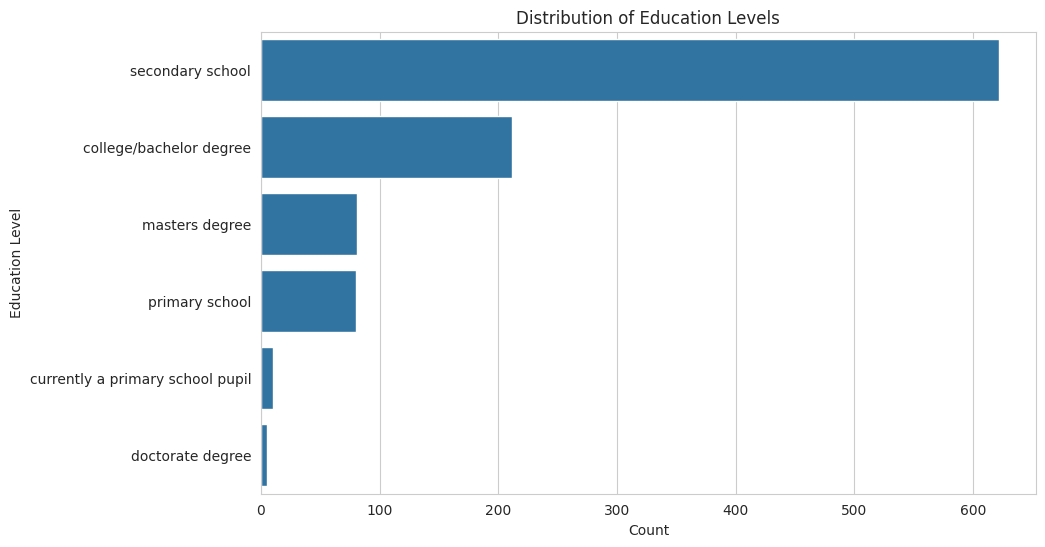

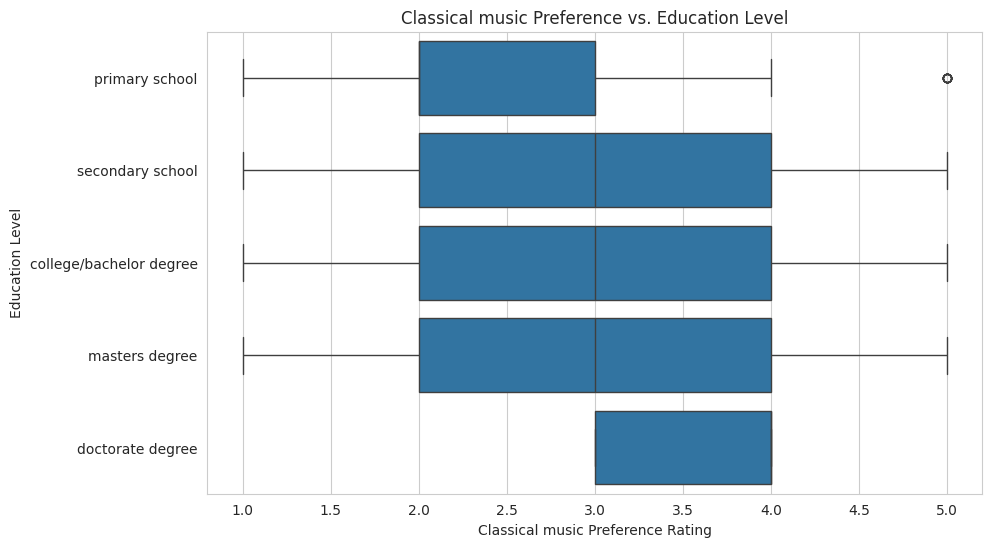

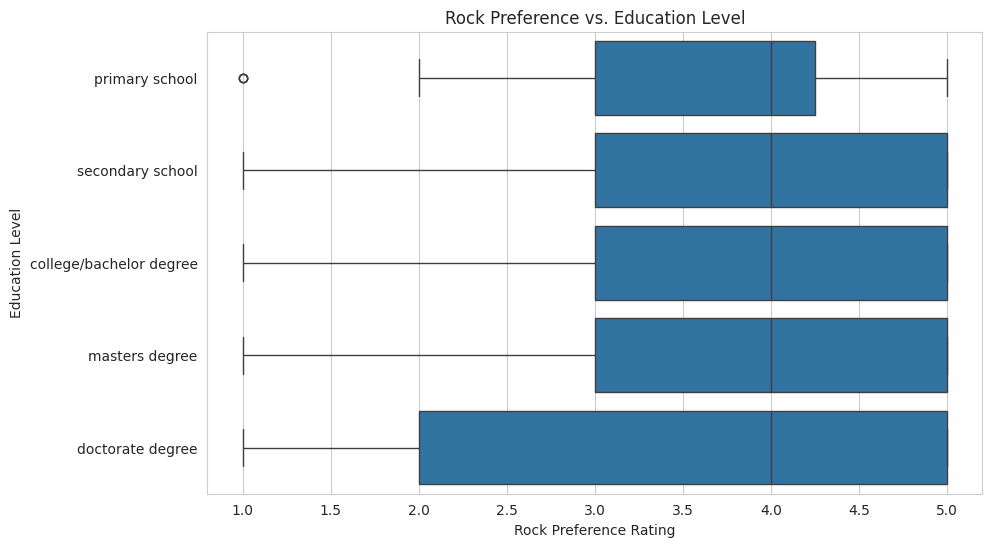

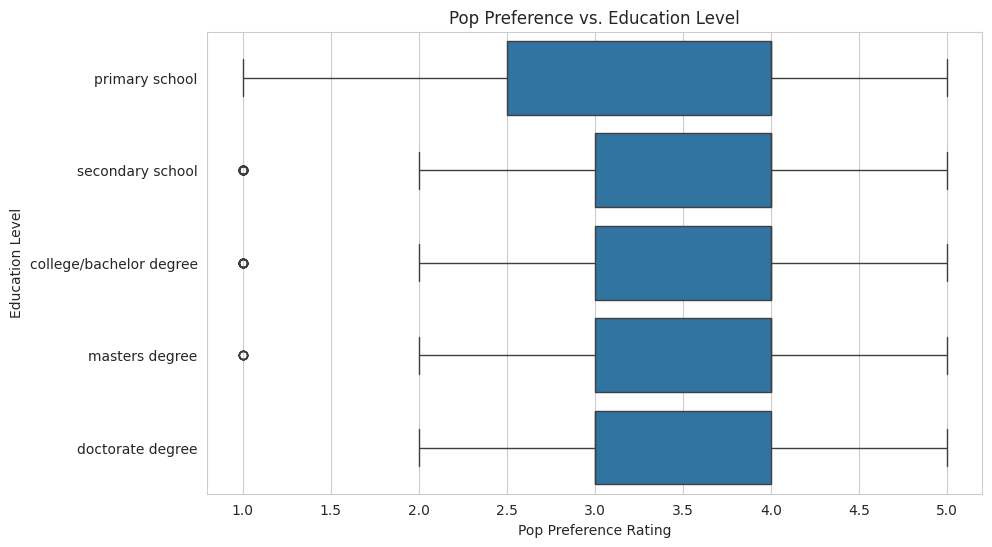

In [62]:
sb.set_style("whitegrid")

plt.figure(figsize=(10, 6))
sb.countplot(y=data['Education'], order = data['Education'].value_counts().index)
plt.title('Distribution of Education Levels')
plt.xlabel('Count')
plt.ylabel('Education Level')
plt.show()

selected_genres = ['Classical music', 'Rock', 'Pop']
for genre in selected_genres:
    plt.figure(figsize=(10, 6))
    sb.boxplot(x=genre, y='Education', data=df, order=['primary school', 'secondary school', 'college/bachelor degree', 'masters degree', 'doctorate degree'])
    plt.title(f'{genre} Preference vs. Education Level')
    plt.xlabel(f'{genre} Preference Rating')
    plt.ylabel('Education Level')
    plt.show()

Plotting a heatmap of the correlation matrix

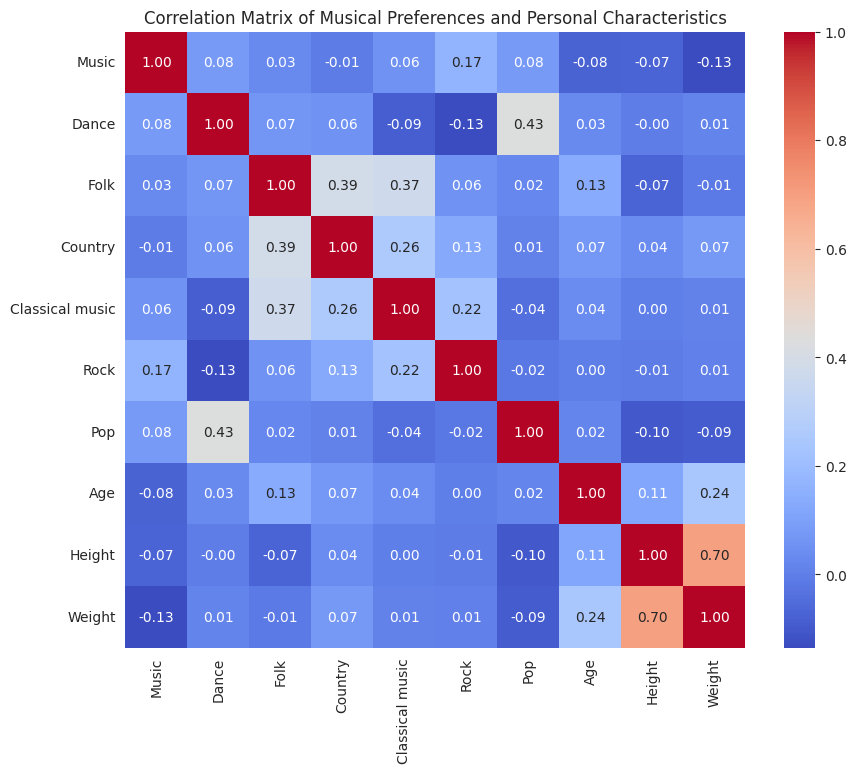

In [53]:
selected_columns = ['Music', 'Dance', 'Folk', 'Country', 'Classical music', 'Rock', 'Pop', 'Age', 'Height', 'Weight']
subset_data = data[selected_columns]

correlation_matrix = subset_data.corr()
plt.figure(figsize=(10, 8))
sb.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Musical Preferences and Personal Characteristics')
plt.show()


# 8. Spearman's rank correlation
# Performing Spearman's rank correlation test on the dataset

In [64]:
numericalData = data.select_dtypes(include=['float64', 'int64'])

spearman = numericalData.corr(method='spearman')
spearman.head()

,Music,Slow songs or fast songs,Dance,Folk,Country,Musical,Metal or Hardrock,Punk,"Hiphop, Rap","Reggae, Ska",...,Shopping centres,Branded clothing,Entertainment spending,Spending on looks,Spending on gadgets,Spending on healthy eating,Age,Height,Weight,Number of siblings
Music,1.000000,0.069162,0.045190,0.006258,-0.040940,0.066158,0.015268,0.065355,0.052163,0.032830,...,0.124139,0.037610,0.078762,0.117706,0.042533,0.080182,-0.091257,-0.066281,-0.101810,-0.008775
Slow songs or fast songs,0.069162,1.000000,0.185594,-0.069422,-0.081564,-0.075972,0.039124,0.055342,0.148533,0.037507,...,0.075328,0.023144,0.112809,0.039397,0.051524,-0.017661,0.036743,0.093140,0.114164,0.009793
Dance,0.045190,0.185594,1.000000,0.076077,0.050052,0.062982,-0.222236,-0.152931,0.368998,0.089973,...,0.184130,0.048940,0.076906,0.179806,0.073927,0.021452,0.042281,-0.003471,0.010550,0.018110
Folk,0.006258,-0.069422,0.076077,1.000000,0.376657,0.256643,0.100931,0.052497,-0.081032,0.136215,...,-0.087077,-0.144528,-0.099453,-0.135173,-0.157085,-0.024350,0.111435,-0.092456,-0.017983,0.084943
Country,-0.040940,-0.081564,0.050052,0.376657,1.000000,0.193921,0.109214,0.088481,-0.043492,0.118089,...,-0.074715,-0.055044,-0.082102,-0.104539,0.020064,-0.002547,0.058834,0.037643,0.078146,0.020617


There is generally a low correlation between music preferences and personal characteristics such as age, height, and weight. Music preference has a correlation coefficient of -0.091676 with age, which indicates a very slight negative correlation where older individuals might have slightly different music preferences compared to younger ones, though the relationship is weak.  Specific music genres show different levels of correlation with other preferences and characteristics. For example: the preference for dance music is positively correlated(0.418316) with liking pop music, which suggests that individuals who enjoy dance music are also likely to enjoy pop music. Lifestyle choices such as "Spending on gadgets" and "Spending on healthy eating" show low to moderate correlations with musical preferences and other lifestyle choices. This suggests some degree of association between how individuals allocate their spending and their preferences in music and activities. The correlations observed suggest that while there are associations between musical preferences and lifestyle choices, these relationships are generally weak to moderate. This indicates that people's musical tastes do not strongly indicate their lifestyle choices in a direct manner. For example: someones preference for classical music does not strongly predict their spending habits or physical characteristics like height and weight.

However, the moderate correlations between certain music genres and lifestyle choices like dance and pop music with entertainment spending shows more nuanced relationships. Individuals who favor certain music types might share common lifestyle patterns, possibly due to cultural, social, or personal identity factors that influence both music preferences and lifestyle decisions.

Personal characteristics such as age, height, and weight have very weak correlations with music preferences. This suggests that while there might be slight tendencies for certain age groups or physical characteristics to lean towards specific music genres, these traits are not strong predictors of musical tastes.

The test shows that there is a slight to moderate connection between what music people like, how they live, and their personal traits. Which means that a person's choice in music and their way of life influence each other in complex ways.